# Explore here

In [26]:
import os
import pandas as pd
#import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()



True

In [27]:
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [28]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [32]:
artist_id = "3TVXtAsR1Inumwj472S9r4"

response = con.artist_top_tracks("3TVXtAsR1Inumwj472S9r4")

if response:
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]
  print(tracks)


[{'duration_ms': 2.899766666666667, 'name': 'One Dance', 'popularity': 86}, {'duration_ms': 5.31985, 'name': 'Rich Baby Daddy (feat. Sexyy Red & SZA)', 'popularity': 82}, {'duration_ms': 3.879566666666667, 'name': 'Push Ups', 'popularity': 82}, {'duration_ms': 3.1648833333333335, 'name': 'WAIT FOR U (feat. Drake & Tems)', 'popularity': 81}, {'duration_ms': 3.6394, 'name': 'Jimmy Cooks (feat. 21 Savage)', 'popularity': 81}, {'duration_ms': 7.61555, 'name': 'Family Matters', 'popularity': 81}, {'duration_ms': 4.982333333333333, 'name': 'Passionfruit', 'popularity': 81}, {'duration_ms': 3.3162166666666666, 'name': "God's Plan", 'popularity': 81}, {'duration_ms': 4.335183333333333, 'name': 'IDGAF (feat. Yeat)', 'popularity': 80}, {'duration_ms': 4.124066666666667, 'name': 'First Person Shooter (feat. J. Cole)', 'popularity': 78}]


In [33]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                                  name  popularity
9     4.124067  First Person Shooter (feat. J. Cole)          78
8     4.335183                    IDGAF (feat. Yeat)          80
3     3.164883       WAIT FOR U (feat. Drake & Tems)          81


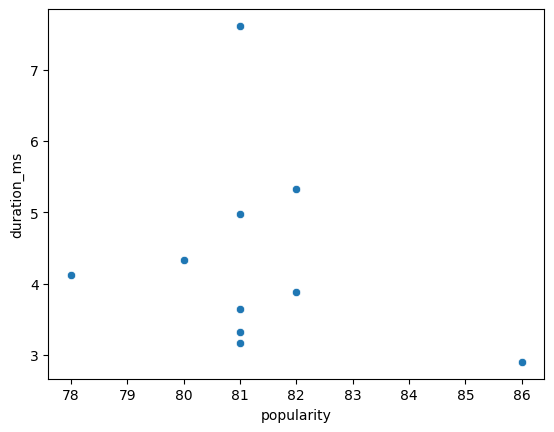

In [35]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

In [ ]:
# No hay relacion entre la popularidad de una canción y la duración de la misma, en el gráfico se puede ver como 
# todos los puntos están dispersos sin seguir una linealidad.